Automatically created module for IPython interactive environment


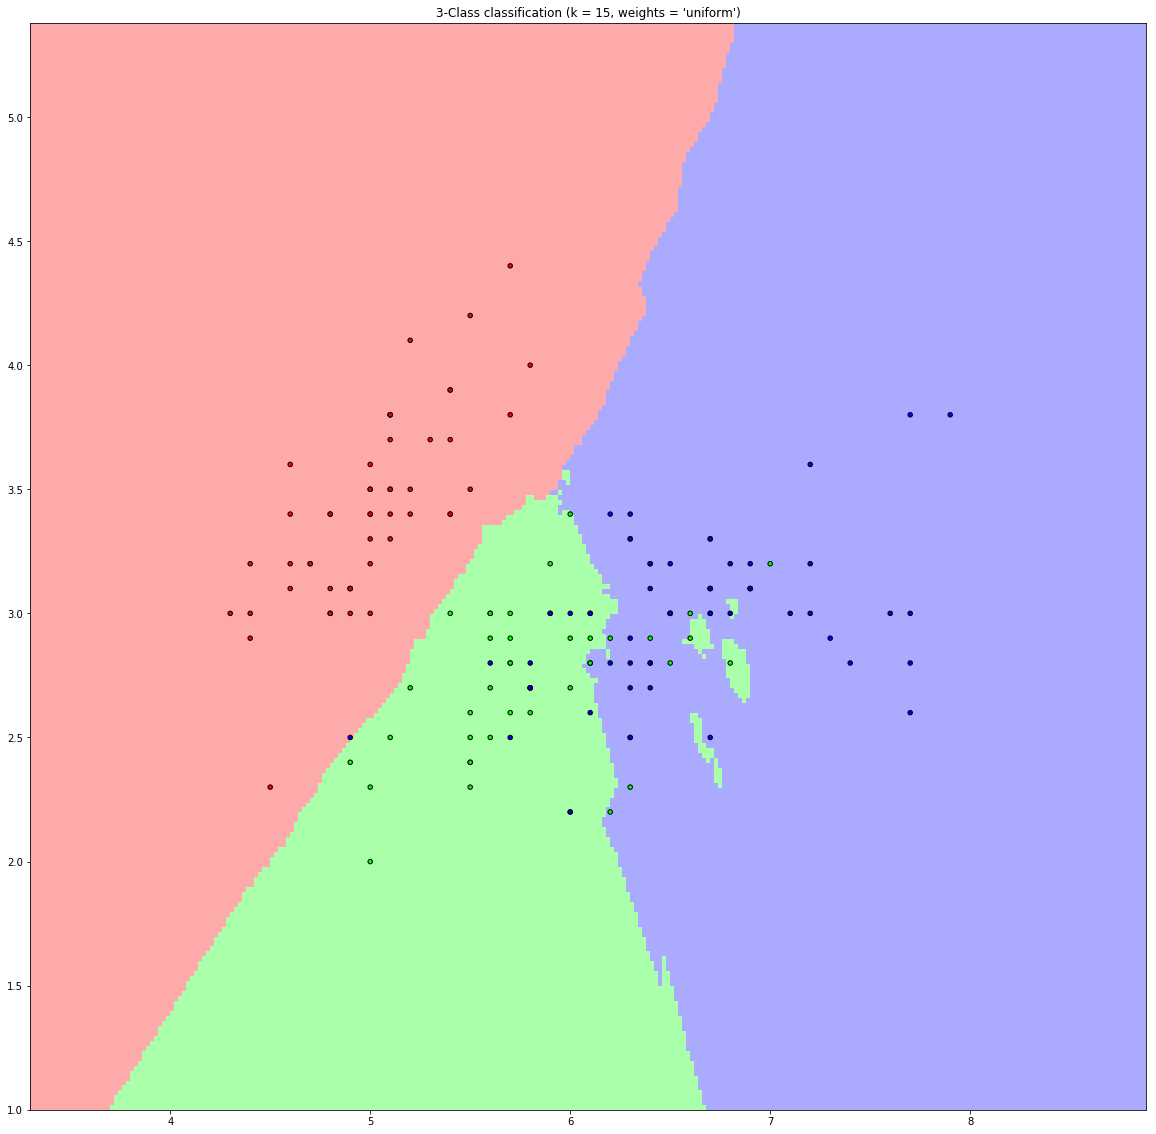

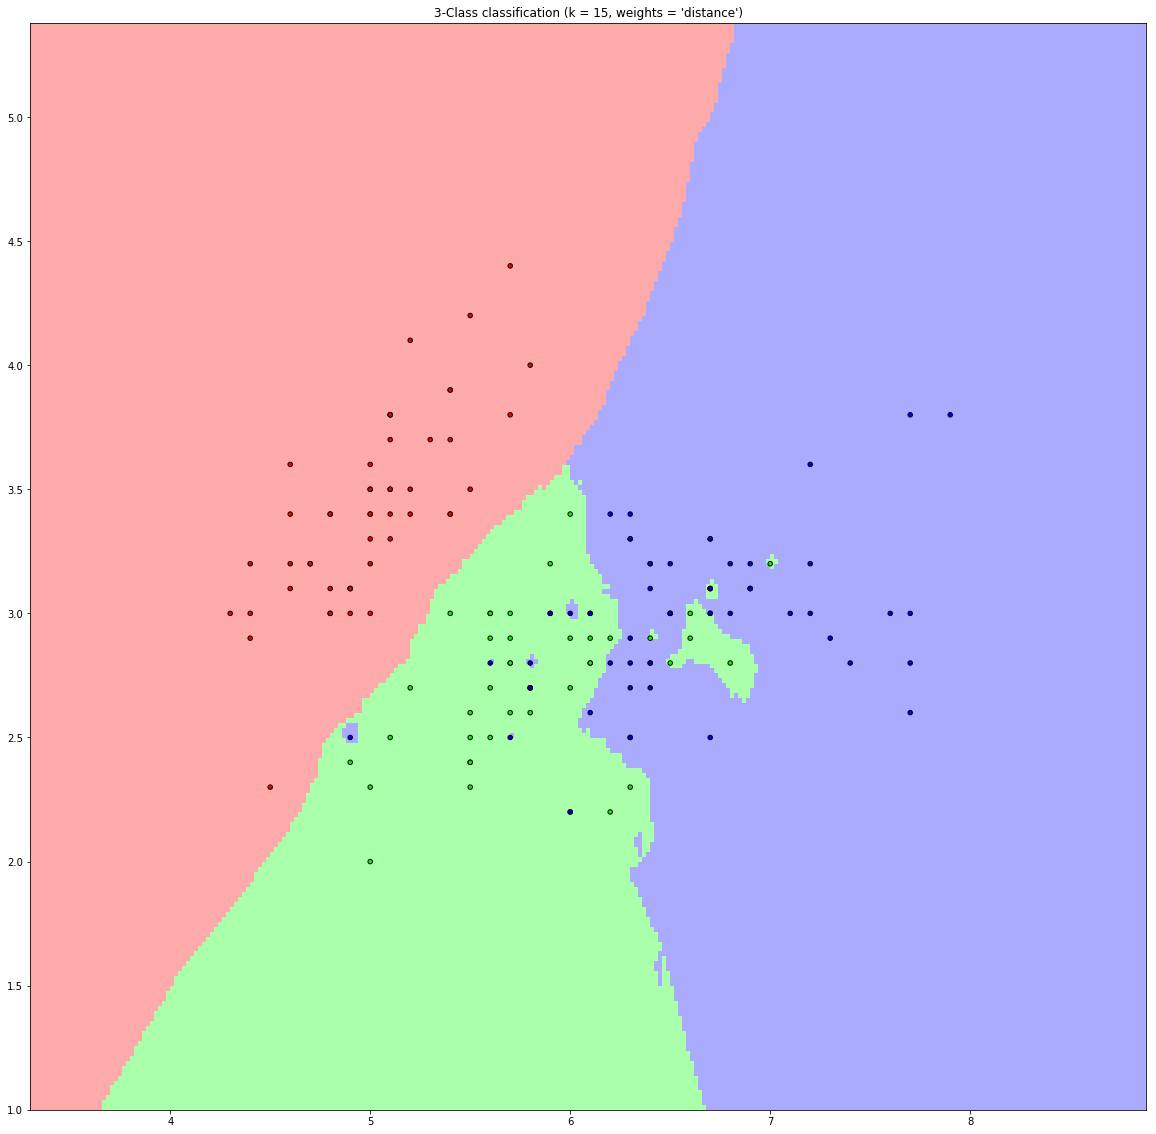

In [41]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from matplotlib.backends.backend_pdf import PdfPages

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
pp = PdfPages('multipage.pdf')

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    pp.savefig()

plt.show()
pp.close()

In [42]:
import pandas as pd
df = pd.read_csv('FloodRisk.csv')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
k = df.sort_values(by=['Lon', 'Lat'])


In [94]:
X=k.iloc[25000:30000,0:2].values
y=k.iloc[25000:30000,7].values

In [95]:
#RISK LEVEL 1
R1 =  []
y1 = []
for i in range(y.shape[0]):
    if(y[i] == 1):
        R1.append(X[i])
        y1.append(y[i])
r1 = np.asarray(R1)
y1 = np.asarray(y1)

#RISK LEVEL 2
R2 =  []
y2 = []
for i in range(y.shape[0]):
    if(y[i] == 2):
        R2.append(X[i])
        y2.append(y[i])
r2 = np.asarray(R2)
y2 = np.asarray(y2)
#RISK LEVEL 3
R3 =  []
y3 = []
for i in range(y.shape[0]):
    if(y[i] == 3):
        R3.append(X[i])
        y3.append(y[i])
r3 = np.asarray(R3)
y3 = np.asarray(y3)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(1693,)
(2262,)
(1045,)


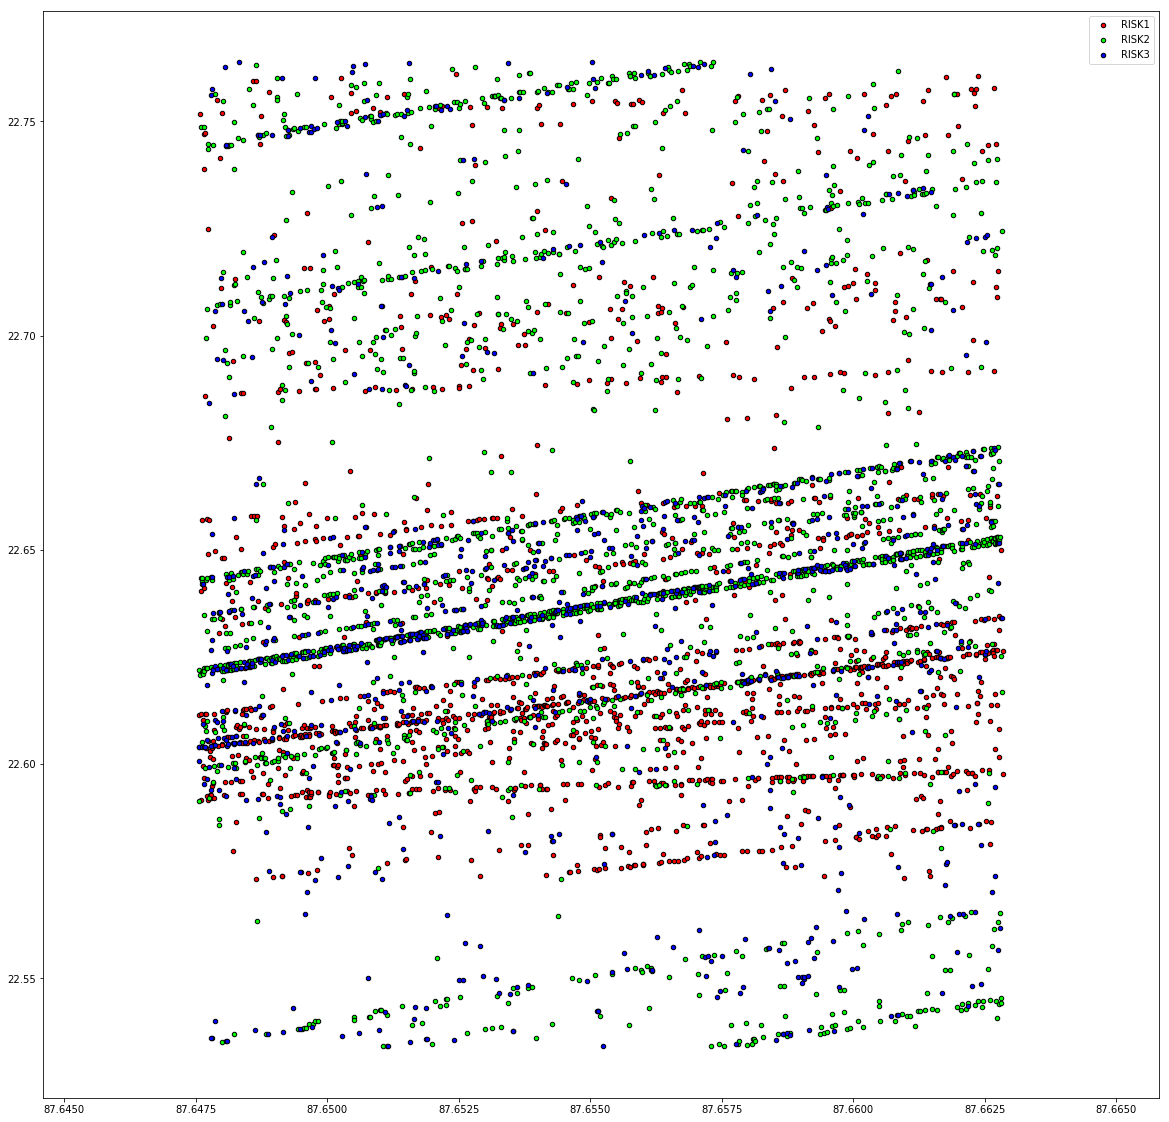

In [96]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

ax.scatter(r1[:, 0], r1[:, 1], c='#FF0000', cmap=cmap_bold,edgecolor='k',s=20,label="RISK1")
ax.scatter(r2[:, 0], r2[:, 1], c='#00FF00', cmap=cmap_bold,edgecolor='k',s=20,label="RISK2")
ax.scatter(r3[:, 0], r3[:, 1], c='#0000FF', cmap=cmap_bold,edgecolor='k',s=20,label="RISK3")
ax.legend(loc='best')
plt.show()

In [91]:
h = .0002 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

(100833, 2)
(100833, 2)


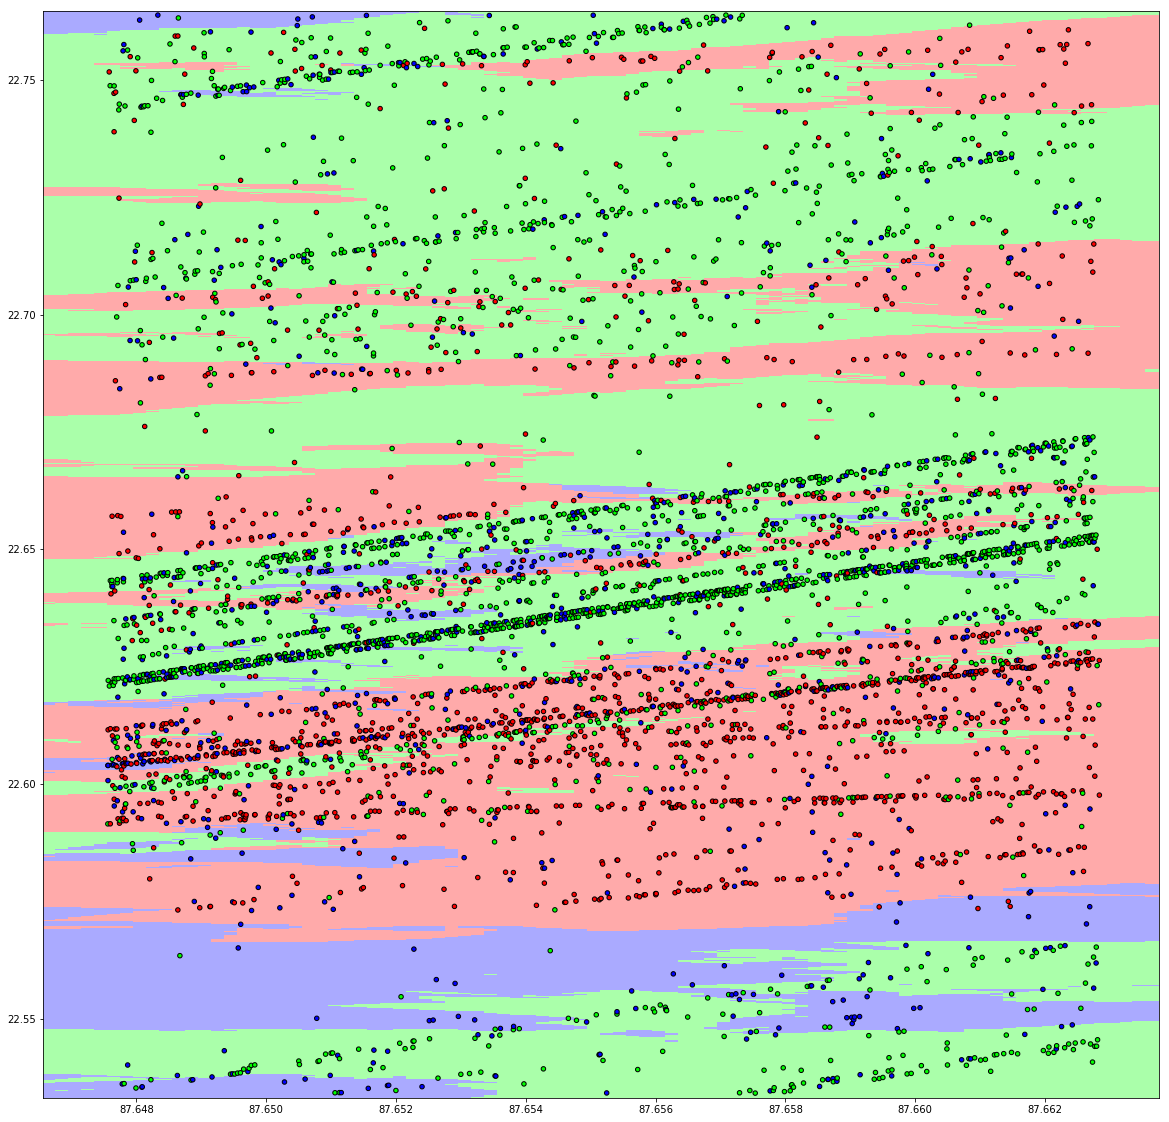

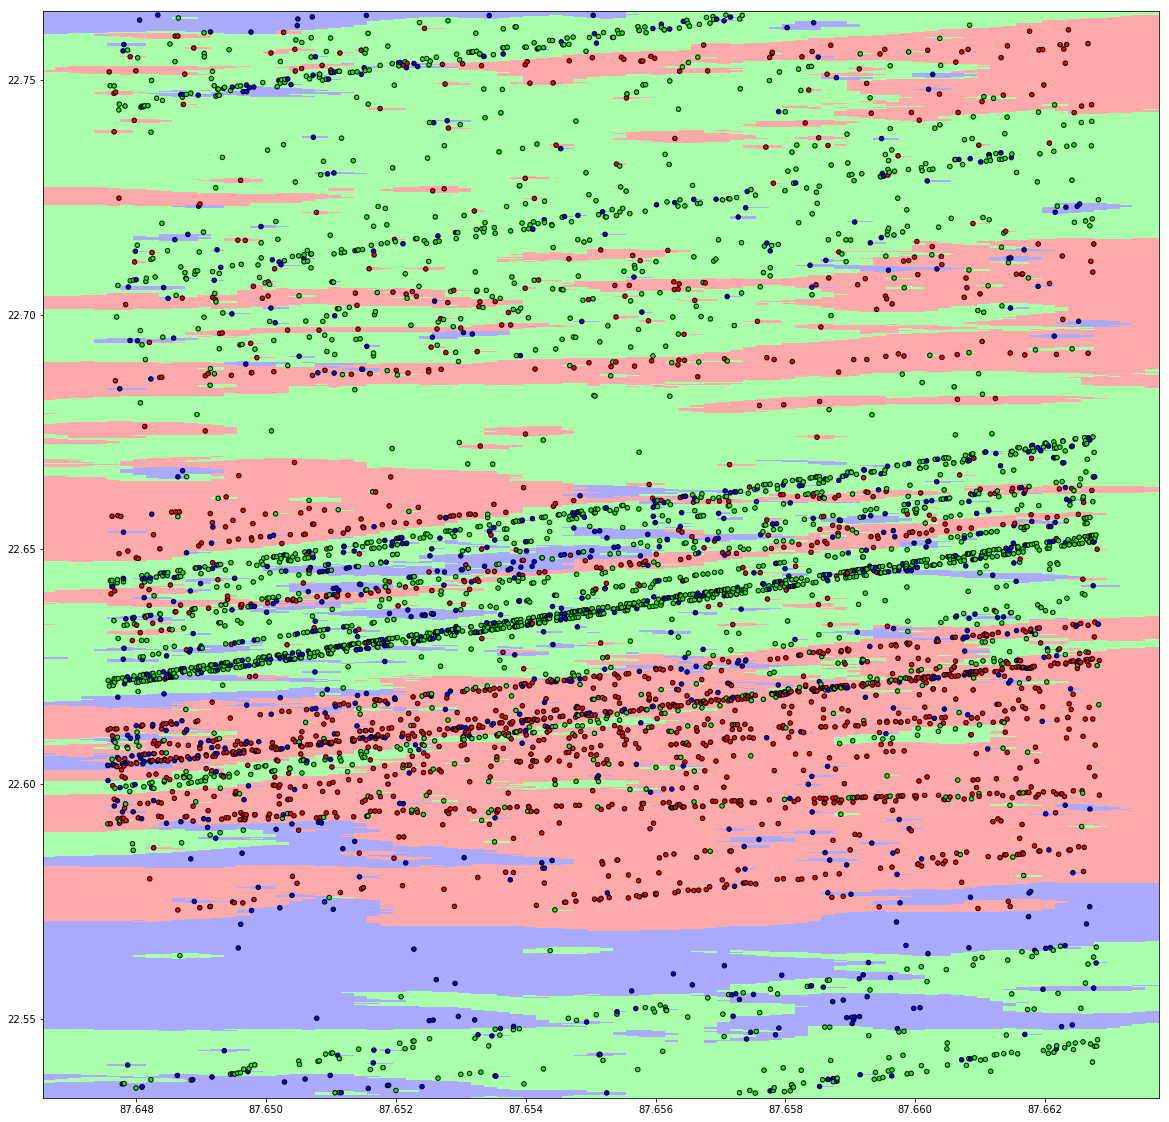

In [97]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    fig = plt.figure(figsize=(20,20))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.001, X[:, 0].max() + 0.001
    y_min, y_max = X[:, 1].min() - 0.001, X[:, 1].max() + 0.001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(yy)
    mesh = np.c_[xx.ravel(), yy.ravel()]
    print(mesh.shape)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ax = fig.add_subplot(111)
    #print(Z.shape)
    #a = np.array((1,2))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    k = ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    #ax.xlim(xx.min(), xx.max())
    #ax.ylim(yy.min(), yy.max())
    ax.legend(loc='')
    #ax.title("3-Class classification (k = %i, weights = '%s')"
     #         % (n_neighbors, weights))

plt.show() 

In [39]:
#How to Predict
a = np.array((87.6850,22.1))
b = a.reshape((1,2))
b.shape
Z = clf.predict(b)
print(Z)

[2]


In [41]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [55]:
x_test = np.random.uniform(87.6775,87.6950,1000)
y_test = np.random.uniform(22.55,22.77,1000)

In [58]:
mesh = np.c_[x_test.ravel(), y_test.ravel()]

In [73]:
Z = clf.predict(mesh)
print(Z.shape)

(1000,)


In [63]:
import csv

In [100]:
download_dir = "prediction2.csv"

In [101]:
csv = open(download_dir, "w") 

In [102]:
columnTitleRow = "X, Y, RISK\n"

In [105]:
csv.write(columnTitleRow)
X1 = x_test.ravel() 
Y1 = y_test.ravel()
Z1 = Z.ravel()
#c = str(50)
print(Z1[824])
print(X1[824])
print(Y1[824])

1
87.6813187427
22.6608452894


In [104]:
for i in range(1000):
    X = str(X1[i])
    Y = str(Y1[i])
    RISK = str(Z[i])
    row = X + "," + Y + "," + RISK + "\n"
    csv.write(row)